# Weekly Session 8

## Goal
To develop a basic familiarity and proficiency with numerical rootfinding.

## Readings
We will skip the remainder of the linear equations material (6.2) and move directly onto solutions of nonlinear equations.

    6.3.1 Relaxation Method
    
    6.3.2 Convergence Rate
    
    6.3.4 Binary search -- a.k.a. the bisection method

    6.3.5 Newton's method -- a.k.a. the Newton-Raphson method

Although we will not specifically cover extremization in this week's handout, you should also read enough to get a basic idea of what is possible:

    6.4 Maxima and minima of functions
    
## Overview

We will start with a brief introduction to solving non-linear equations, using the relaxation method.  Then you will build up your own module named ```rootfind```, containing functions which implement each of the basic numerical rootfinding methods: the **bisection** method, the **Newton-Raphson** method (for when the derivative is known), and the **Dekker secant** method (for when it is not).  You will also see the value in *hybridizing* these latter two methods with the bisection method.  

As always, scipy has some beautiful versions of these codes available.  So after you have written your own **Newton-Raphson** method, we will switch over to using library functions.

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.newton.html

In [4]:
#For colored cells, currently blue cells, black text 
#https://stackoverflow.com/questions/18024769/adding-custom-styled-paragraphs-in-markdown-cells
from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r").read()
    return HTML(styles)
css_styling()

<div class=answer>
*This should be a blue cell with black font if you set the filepath correctly*</font>
<div/>

## Exercise 0 - Jupyter Notebook 

### Keyboard Shortcuts

Read this and try some out.
http://maxmelnick.com/2016/04/19/python-beginner-tips-and-tricks.html

My favorites are "B," "M," and "Enter" so far, but I'm working on more.

### Some plotting tricks

Run the following code cell.  Notice the last (active) line resets the default font on your plots to a larger size.  You can use similar calls to change many more plotting defaults [link](https://matplotlib.org/api/matplotlib_configuration_api.html).

In [5]:
import math
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

plt.rcParams['font.size']=14

#line below prints all possible default variables stored in the dictionary rcParams
#plt.rcParams.keys()  

### Passing function arguments
These semester you have become very experienced passing functions as arguments in other functions.  For instance: 

In [4]:
def q(x):
    '''Calculates a simple mathematic function 
    
    It is written using numpy's exponential function (not math) so it can operate on numpy arrays.
    accepts: x - float
    returns f(x) - float
    '''
    
    return x

def g(f,x):
    '''Calls another function f(x) and prints its return value 
    
    accepts: 
        x - float
        f(x) - float
    returns 
        None
    '''
    
    print(f(x))
    return None

#call g to act on q at x=2, which prints q(x)=x.  
#Very convoluted way to do something simple
g(q,2)

2


But what if we want to work with a more complicated function?  For instance what if I want to call the following: 

In [13]:
def r(x,y,z):
    return x+y+z

You are probably thinking, this is easy - we can just do the same thing you did with ```x``` above, by passing it to g(f,x) as a separate argument.  But notice that you would have to redefine the function ```g``` to be ```g(f,x,y,z).```  Doesn't this seem inefficient?  

*For instance, what if you want to write ```g``` so it could print the output of any function, not just design it for a single function?*

Lets do that.  The method for doing so is to use a function parameter named ```*args``` or "star args".  

In [6]:
def g1(f,*args):
    '''Calls another function f(x) and prints its return value 
    
    accepts: 
        x - float # this is incorrect
        f(x) - float
    returns 
        None
    '''
    
    print("You passed the function (object): ",f, "with arguments:" ,*args)

    print(f(*args))
    return None

So lets run ```g1``` on the function r:

In [38]:
g1(r,1,2,3)

You passed the function (object):  <function r at 0x119c0a158> with arguments: 1 2 3
6


Play around with the codes above.  For instance, 
* call ```g1``` on another function which takes 2 or 4 arguments (instead of 1 or 3). 
* print individual values of ```*args``` - **see the last link below for this**

<div class=answer>
Answer below.  Add code cells as necessary.
<div/>

In [7]:
#your code here
def q2 (x, y, z, m):
    """
    Description: calculates a simple mathematic function
    
    Parameters: x - float
                y - float
                z - float
                m - float
    
    Returned: float
    
    Usage:
    (q2, 1, 2, 3, 4)
    10
    """
    return x + y + z + m

print (g1 (q2, 1, 2, 3, 4))

You passed the function (object):  <function q2 at 0x0000000007E55840> with arguments: 1 2 3 4
10
None


Want to know more?  Here are a few links to show you the big picture:
* https://www.python-course.eu/passing_arguments.php
* http://www.informit.com/articles/article.aspx?p=2314818
* https://www.saltycrane.com/blog/2008/01/how-to-use-args-and-kwargs-in-python/

## Exercise 1: Intro to the Relaxation Method and Convergence

Newman uses $f(x) = 2 - e^{-x}$ as his first test case.  Let's start by plotting that and simply checking that the solution in Newman 6.3.1 is approximately correct.  

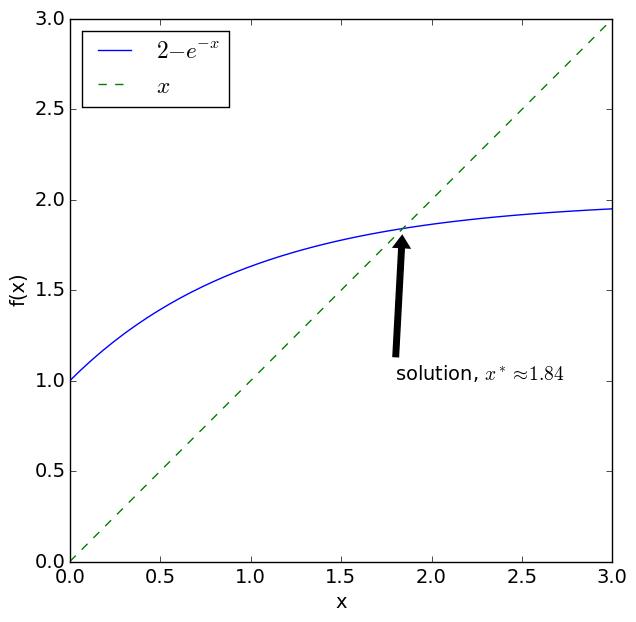

In [10]:
def f(x):
    '''Calculates a simple mathematic function from Newman 6.3.1
    
    It is written using numpy's exponential function (not math) so it can operate on numpy arrays.
    accepts: x - float
    returns f(x) - float
    '''
    
    return 2 - np.exp(-x)

#define the x-range
x = np.linspace(0,3)

#set up the plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

#plot the function - both left hand side and right hand side
ax.plot(x,f(x),label=r"$2-e^{-x}$")
ax.plot(x,x,label=r"$x$",ls='--')

#add good labels
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_aspect('equal')

#add a label to be extra transparent
text1 = ax.annotate(r'solution, $x^* \approx 1.84$', xy=(1.84, 1.84), xytext=(1.8, 1.0),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

*Notice how I added an arrow and text to the figure above?  This is very useful.*

### Solve the equation $x=2-e^{-x}$ as in Newman, and include a measure of the error at each step.

In [119]:
#your code here
xPrev = 1
c = 1e-16
epsilon = c+1

def fPrime(x):
    """
    Description: calculates a simple mathematic function
    
    Parameters: x - float
    
    Returned: float
    
    Usage:
    fPrime (0)
    1
    """
    return math.exp(-x)

def relaxation_error(fPrime, xPrev, xCur):
    """
    Description: determines relaxation error for the current x-value
    
    Parameters:fPrime - derivative of function having relaxation method applied to it
                xPrev - previous x-value
                xCur - current x-value
    
    Returned: error for current x-value 
    
    Usage:
    relaxation_error (fPrime, 2, 3)
    0.15651764274966568
    """
    return((xPrev - xCur)/(1-1/fPrime(xPrev)))

while abs(epsilon) > c:
    xCur = 2 - math.exp (-xPrev)
    epsilon = relaxation_error(fPrime, xPrev, xCur)
    xPrev = xCur
    
    print("Error: ",epsilon)
    print ("X: ", xCur)

Error:  0.36787944117144233
X:  1.6321205588285577
Error:  0.04188993577969419
X:  1.8044854658474119
Error:  0.0060973763784867635
X:  1.8354408939220457
Error:  0.0009521753003407681
X:  1.8404568553435368
Error:  0.00015063143549983704
X:  1.841255113911434
Error:  2.3879760329019322e-05
X:  1.8413817828128696
Error:  3.786954967267934e-06
X:  1.8414018735357267
Error:  6.005835888898029e-07
X:  1.8414050598547234
Error:  9.524900588053624e-08
X:  1.8414055651879888
Error:  1.5105949355800835e-08
X:  1.8414056453310121
Error:  2.395717982334035e-09
X:  1.8414056580412428
Error:  3.799473104513187e-10
X:  1.8414056600570134
Error:  6.025745329714233e-11
X:  1.841405660376703
Error:  9.556497921368437e-12
X:  1.841405660427404
Error:  1.5156083298180408e-12
X:  1.841405660435445
Error:  2.404013543863151e-13
X:  1.8414056604367204
Error:  3.8085869166297916e-14
X:  1.8414056604369224
Error:  6.068627504518539e-15
X:  1.8414056604369546
Error:  9.626098800270417e-16
X:  1.8414056604369

#### Prove mathematically that the Relaxation Method will work on the function above.  Show your work and briefly explain

<div class=answer>
<div/>
Answer here (add a code cell to make your life easier.)

The relaxation method will work if $|f'(x^*)|<1$ where $x^*$ is the solution.

$|f'(1.8414056604369606)|<1$

$|e^{-1.8414056604369606}|<1$

In [17]:
math.exp(-1.8414056604369606)

0.15859433956303937

## Exercise 2

### Newman's Exercise 6.10: The percolation transition

Consider the equation $x = 1 - \ e^{-cx}$, where $c$ is a known parameter and $x$ is unknown.  This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

####  First plot the function for the case $c=2$.  
Mark both the trivial solution and the (approximate) non-trivial solution. 

**Lab-like exercise: **
Write a full description of your plots for this section, as if you were in lab.  While it might not be so clear why this is named *the percolation transition* hopefully it is very clear why this is called *the epidemic threshold*.  Please include some insights related to this name in your description of these plots.

In [24]:
def relaxation (func, funcPrime, xInit, tolerance, *args):
    """
    Description: calculates the solution to a nonlinear equation of a single variable
    
    Parameters: func - equation being evaluated
                funcPrime - derivative of func
                xInit - initial guess as to the solution for the equation
                tolerance - tolerance solution will be within
                *args - additional arguments for func
    
    Returned: solution to the nonlinear equation of a single variable, and the final error
    
    Usage:
    c = 2
    tolerance = 10e-6
    xInit = 0.75
    relaxation (f2, f2Prime, xInit, tolerance, c)
    (0.796805894262 6.23591934574e-06)
    """
    
    def relaxationError(xPrev, xCur):
        """
        Description: calculates relaxation error for the current x-value

        Parameters: xPrev - previous x-value
                    xCur - current x-value

        Returned: relaxation error for the current x-value

        Usage:
        relaxationError (0.75, 0.776869839852) 
        0.0216544773257
        """
        return((xPrev - xCur)/(1-1/funcPrime(xPrev, *args)))
    
    xPrev = xInit
    xCur = func (xPrev, *args)
    epsilon = relaxationError(xPrev, xCur)
    xPrev = xCur
    
    while abs(epsilon) > tolerance:
        xCur = func (xPrev, *args)
        epsilon = relaxationError(xPrev, xCur)
        xPrev = xCur
    

    return xCur, epsilon


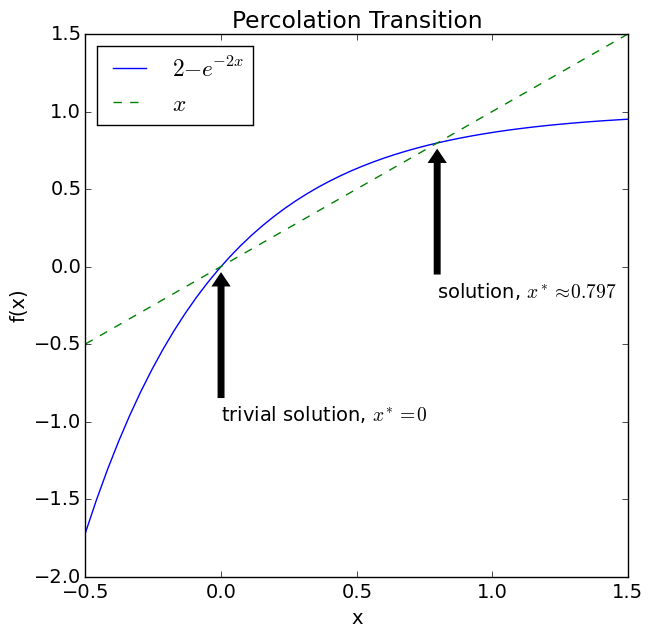

In [25]:
#your code here
def f2 (x, c):
    '''Calculates a simple mathematic function from Newman 6.3.1
    
    It is written using numpy's exponential function (not math) so it can operate on numpy arrays.
    accepts: x - float
             c - float
    returns f(x, c) - float
    '''
    
    return 1 - np.exp (-c * x)

def f2Prime (x, c):
    """
    Description: Calculates a simple mathematic function
    
    Parameters: x - float
                c - float
    
    Returned: float
    
    """
    return c * np.exp (-c * x)

c = 2
tolerance = 10e-6
xInit = 0.75

solution, error = relaxation (f2, f2Prime, xInit, tolerance, c)

#define the x-range
x = np.linspace(-0.5, 1.5)

#set up the plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

#plot the function 
ax.plot(x, f2 (x, c), label = r"$2-e^{-2x}$")
ax.plot(x, x, label=r"$x$", ls='--')

#add good labels
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title ("Percolation Transition")

#add a label to be extra transparent
text1 = ax.annotate(r'trivial solution, $x^* = 0$', xy=(0, 0), xytext=(0, -1.0),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
text2 = ax.annotate(r'solution, $x^* \approx {:.3}$'.format (solution), xy=(solution, f2(solution, c)), xytext=(solution, f2(solution, c) - 1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

<div class=answer>
<div/>
The x-axis is the different values of x, ranging from -0.5 to 1.5. The y-axis shows the values of the function when evaluated at the values of the x-axis, and ranges from -2.0 to 1.5. This figure shows the Percolation Transition function $2 - e^{-2x}$ as well as the function $y = x$. The figure shows the points at which the two functions cross at $x^* = 0$ and $x^* \approx 0.787$. The Percolation Transition function is shown in blue, and the $y = x$ function is shown in green.

#### Write a program to solve this equation for $x$ using the relaxation method for the case $c=2$.  
Calculate your solution to an accuracy of at least $10^{-6}$.

In [36]:
#your code here
c = 2
tolerance = 10e-6
xInit = 0.75

solution, error = relaxation (f2, f2Prime, xInit, tolerance, c)
print ("Solution:", solution)
print ("Error:   ", error)

Solution: 0.796805894262
Error:    6.23591934574e-06


#### Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01 and make a plot of $x$ as a function of $c$.  
   
   You should see a clear transition from a regime in which $x=0$ to a regime of nonzero $x$.   This is another example of a phase transition.   In physics this transition is known as the *percolation transition*;   in epidemiology it is the *epidemic threshold*.

C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: divide by zero encountered in double_scalars


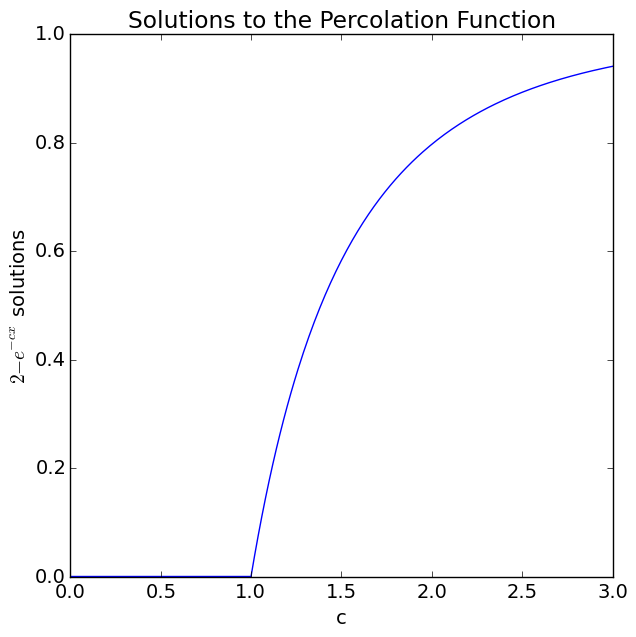

In [27]:
#your code here
cValues = np.arange (0, 3 + 0.01, 0.01, float)
tolerance = 10e-6
xInit = 1

solutions = []
errors = []

#establish solution values for each c-value
for c in cValues:
    solution, error = relaxation (f2, f2Prime, xInit, tolerance, c)
    solutions.append (solution)
    errors.append (error)

    
#define the x-range
x = np.linspace(-0.5, 1.5)

#set up the plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

#plot the function
ax.plot(cValues, solutions)

#add good labels
ax.set_title ("Solutions to the Percolation Function")
ax.set_xlabel('c')
ax.set_ylabel(r"$2-e^{-cx}$ solutions")

<div class=answer>
<div/>
The x-axis is the c-values at which the Percolation Function is being varied ranging from 0 to 3.0. The y-axis shows the solutions to the function $2 - e^{-cx}$ where c is the independant variable. The y-axis ranges from 0 to 1.0. The function is shown in blue. From c = 0 to c = 1 the function has a value of zero. The reason this region is zero is due to the solution method only checking for positive roots, so we lose data for this region. From c = 1 to c = 3 the function is increasing in value. The initial slope of the function at and after c = 1 is steep, and has a smooth transition to a shallow curve by a c-value around 2.25. 

This figure helps to show why this method might be called the epidemic threshold. The reason for this is because the slope is steep initially similiar to how an epidemic spreads rapidly initially. Then as a large part of the population is infected the slope decreases because not as many people are able to be infected.

## Exercise 3: Benchmark function for rootfinding
You will use the function
$$
f(x)=\cos x - x
$$

as a benchmark  in developing the following routines.  To orient yourself, first make a plot of the benchmark function. You will want to plot it over a
reasonably wide range, *e.g.*, $-10\leq x \leq 10$, since you will be playing with different choices of initial intervals and guess points in this range.


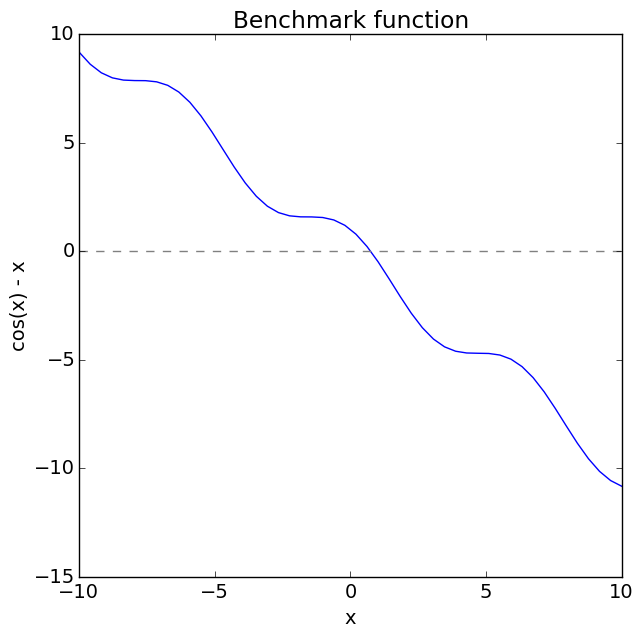

In [34]:
#your plot here
#include the following line so you can see where your function crosses zero.
#ax.axhline(y=0,ls='--',color='gray')

def f_bench(x):
    """
    Description: calculates a simple mathematic function
    
    Parameters:x - float
    
    Returned: float
    
    Usage:
    f_bench (0)
    1
    """
    return np.cos (x) - x

#define the x-range
xValues = np.linspace(-10, 10)
yValues = f_bench (xValues)


#set up the plot
fig = plt.figure(figsize=(7,7))

#plot the function
plt.plot(xValues, yValues)
#plot y = 0
plt.axhline(y=0,ls='--',color='gray')

#add good labels
plt.title ("Benchmark function")
plt.xlabel("x")
plt.ylabel("cos(x) - x")


<div class=answer>
<div/>
The x-axis is the values of the independant variable from -10 to 10. The y-axis is the benchmark function $\cos (x) - x$ at each given x-value and ranges from -10 to 10. The benchmark function has a decreasing slope that ranges from 0 to -1 with a period of $2\pi$, and is shown in blue. The figure also shows $y = 0$ in a gray dashed line. 

## Exercise 4 - introduction to bisection

For efficiency, I have provided a basic code on the bisection method.  Read the code below carefully and check that it is written as you would expect.

The bisection method is our baseline method, to which we will be
comparing the other new members.  Moreover, we will be using bisection
steps when we "hybridize" the bisection method with the other, more
sophisticated rootfinding methods.  So, let us start off our new
rootfind methods by bundling the code above into a function.  

Take a close look, and make sure you understand the logic.  The loop structure is designed to provide a better starting point for the approach we will need to take with in the other rootfinding methods.

For instance, all these other methods are based on the idea of finding successive approximations $x_i$ ($i=0$, $1$, $2$, $\ldots$).  Then the "error" is estimated the difference between the two most recent approximate roots, *i.e.*,
$$
\epsilon_i = x_i - x_{i-1}.
$$

In [32]:
""" rootfind.py -- library of rootfinding routines
     
    Language: Python 3
    Mark A. Caprio
    University of Notre Dame
    Written for Computational Methods in Physics, Spring 2014.
"""

def bisection(f,interval,tolerance,verbose=False):
    """ Find root by bisection.

    The 'approximation' x_i at each iteration is defined by the
    midpoint of the interval.
    
    The 'error' x_i-x_(i-1) is defined by the change in midpoint from
    the midpoint of the last interval.  (Of course, for bisection,
    that is always half the width of the new interval.)

    Returns None if the sign of the function does not change on the
    given interval.  Otherwise, returns final midpoint x_i when
    termination condition is reached.

    f: function for rootfinding
    interval: tuple containing initial interval endpoints (xa,xb)
    tolerance: difference x_i-x_(i-1) at which search should terminate
    verbose (optional): whether or not to print iteration log
    """

    # set up initial bracketing interval
    #   Note: Sign of function *must* change in this interval for method to work.
    (xa,xb) = interval
    fxa = f(xa)
    fxb = f(xb)
    if (fxa*fxb >=0):
        # no sign change in interval
        return None

    # set up for first iteration
    xm = (xb + xa)/2
    error = (xb - xa)/2
    iteration_count = 0

    # bisect until tolerance reached
    while (abs(error) > tolerance):

        # increment iteration count
        iteration_count += 1
        
        # evaluate function
        fxa = f(xa)
        fxb = f(xb)
        fxm = f(xm)

        # find which subinterval contains root
        if (fxm == 0):
            # accidentally landed on root (often occurs for "toy" test intervals)
            xa = xm
            xb = xm
        elif ((fxa * fxm) < 0):
            # sign change is in left half of interval
            xb = xm
        else:
            # sign change is in right half of interval
            xa = xm

        # find new midpoint (and change in midpoint)
        xm_old = xm
        xm = (xb + xa)/2
        error = xm - xm_old

        # verbose iteration log
        if (verbose):
            print("iteration", iteration_count, "(bisection):",
                  "interval", (xa, xb), "root", xm)
            
    return xm #, iteration_count

 When this estimated error falls below the tolerance, we terminate and return the "last guess" $x_i$.  We can think about the bisection method somewhat the same way (at least, we can phrase the termination condition and return value the same way) if we think of the "midpoint" of our interval as $x_i$.  
 
 **See the usage example below:**

In [45]:
# test code
if (__name__ == "__main__"):

    # read in external libraries
    import math

    # define function for rootfinding
    def f_bench(x):
        return math.cos(x) - x
    def fp_bench(x):
        return -math.sin(x) - 1

    # bisection tests

    print("bisection(f_bench,(-1,0),1e-10,verbose=True)")
    print(bisection(f_bench,(-1,0),1e-10,verbose=True))

    print("bisection(f_bench,(0,1),1e-10,verbose=True)")
    print(bisection(f_bench,(0,1),1e-10,verbose=True))

bisection(f_bench,(-1,0),1e-10,verbose=True)
None
bisection(f_bench,(0,1),1e-10,verbose=True)
iteration 1 (bisection): interval (0.5, 1) root 0.75
iteration 2 (bisection): interval (0.5, 0.75) root 0.625
iteration 3 (bisection): interval (0.625, 0.75) root 0.6875
iteration 4 (bisection): interval (0.6875, 0.75) root 0.71875
iteration 5 (bisection): interval (0.71875, 0.75) root 0.734375
iteration 6 (bisection): interval (0.734375, 0.75) root 0.7421875
iteration 7 (bisection): interval (0.734375, 0.7421875) root 0.73828125
iteration 8 (bisection): interval (0.73828125, 0.7421875) root 0.740234375
iteration 9 (bisection): interval (0.73828125, 0.740234375) root 0.7392578125
iteration 10 (bisection): interval (0.73828125, 0.7392578125) root 0.73876953125
iteration 11 (bisection): interval (0.73876953125, 0.7392578125) root 0.739013671875
iteration 12 (bisection): interval (0.739013671875, 0.7392578125) root 0.7391357421875
iteration 13 (bisection): interval (0.739013671875, 0.739135742187

If the tolerance is $10^{-3}$, how many bisections do you expect to need?  What if the tolerance is $10^{-6}$ ?  Or $10^{-9}$ ?  Try this out, and record the number of iteration and the approximate root (or, rather, root-containing interval) you find in each case, for $\cos x - x$.
 
 *Hint:* An incredibly-convenient almost-equality is $2^{10} = 1024 \approx 1000 = 10^3$.  Remember this.  Forever.  This is why 1024 bytes make a "kilobyte" to a computer scientist.

In [35]:
#your code here
# define function for rootfinding

def fp_bench(x):
    """
    Description: calculates a simple mathematic function
    
    Parameters:x - float
    
    Returned:float
    
    Usage:
    fp_bench (0)
    -1
    """
    return -math.sin(x) - 1

tolerances = [1e-3, 1e-6, 1e-9]

for t in tolerances:
    print("bisection(f_bench,(-1,0),{})".format (t))
    print(bisection(f_bench,(0, 1), t))

bisection(f_bench,(-1,0),0.001)
0.7392578125
bisection(f_bench,(-1,0),1e-06)
0.7390851974487305
bisection(f_bench,(-1,0),1e-09)
0.7390851331874728


<div class=answer>
<div/>
Answer here

We can tell that we will require fewer iterations when we allow for larger tolerance values. Since we are looking at larger tolerance values we can say the number of iterations for $10^{-3}$,  $10^{-6}$, and $10^{-9}$ will be less than the 33 required for $10^{-10}$. The exact number of bisections are given below.

bisection(f_bench,(-1,0),0.001)  
root: 0.7392578125, interations: 9

bisection(f_bench,(-1,0),1e-06)  
root: 0.7390851974487305, iterations: 19

bisection(f_bench,(-1,0),1e-09)  
root: 0.7390851331874728, iterations: 29

Try ```bisection``` out on the benchmark function, using the interval $(0,1)$ and a tolerance $10^{-10}$.  How many iterations are required? 

In [116]:
#your code here
# test code
if (__name__ == "__main__"):

    # bisection tests
    print("bisection(f_bench,(0,1),1e-10,verbose=True)")
    print(bisection(f_bench,(0,1),1e-10,verbose=True))

bisection(f_bench,(0,1),1e-10,verbose=True)
iteration 1 (bisection): interval (0.5, 1) root 0.75
iteration 2 (bisection): interval (0.5, 0.75) root 0.625
iteration 3 (bisection): interval (0.625, 0.75) root 0.6875
iteration 4 (bisection): interval (0.6875, 0.75) root 0.71875
iteration 5 (bisection): interval (0.71875, 0.75) root 0.734375
iteration 6 (bisection): interval (0.734375, 0.75) root 0.7421875
iteration 7 (bisection): interval (0.734375, 0.7421875) root 0.73828125
iteration 8 (bisection): interval (0.73828125, 0.7421875) root 0.740234375
iteration 9 (bisection): interval (0.73828125, 0.740234375) root 0.7392578125
iteration 10 (bisection): interval (0.73828125, 0.7392578125) root 0.73876953125
iteration 11 (bisection): interval (0.73876953125, 0.7392578125) root 0.739013671875
iteration 12 (bisection): interval (0.739013671875, 0.7392578125) root 0.7391357421875
iteration 13 (bisection): interval (0.739013671875, 0.7391357421875) root 0.73907470703125
iteration 14 (bisection):

<div class=answer>
<div/>

33 iterations are required for a tolerance value of $10^{-10}$ for our benchmark function.

What happens if you ask for a tolerance of $10^{-21}$?  Does it take as many iterations as you expect?  Do you get what you asked for?  Explain roughly what is going on. 

In [117]:
#your code here
# test code
if (__name__ == "__main__"):
    
    # bisection tests
    print("bisection(f_bench,(0,1),1e-21,verbose=True)")
    print(bisection(f_bench,(0,1),1e-21,verbose=True))

bisection(f_bench,(0,1),1e-21,verbose=True)
iteration 1 (bisection): interval (0.5, 1) root 0.75
iteration 2 (bisection): interval (0.5, 0.75) root 0.625
iteration 3 (bisection): interval (0.625, 0.75) root 0.6875
iteration 4 (bisection): interval (0.6875, 0.75) root 0.71875
iteration 5 (bisection): interval (0.71875, 0.75) root 0.734375
iteration 6 (bisection): interval (0.734375, 0.75) root 0.7421875
iteration 7 (bisection): interval (0.734375, 0.7421875) root 0.73828125
iteration 8 (bisection): interval (0.73828125, 0.7421875) root 0.740234375
iteration 9 (bisection): interval (0.73828125, 0.740234375) root 0.7392578125
iteration 10 (bisection): interval (0.73828125, 0.7392578125) root 0.73876953125
iteration 11 (bisection): interval (0.73876953125, 0.7392578125) root 0.739013671875
iteration 12 (bisection): interval (0.739013671875, 0.7392578125) root 0.7391357421875
iteration 13 (bisection): interval (0.739013671875, 0.7391357421875) root 0.73907470703125
iteration 14 (bisection):

<div class=answer>
<div/>
Answer here

Using a tolerance of $10^{-21}$  it takes 52 iterations (although the 52nd iteration has the exact same root value as the 51st). This is not what I would expect if we were able to have infinite precision. The reason for this is the fact it has taken approximatly three times as many iterations as the exponent of our tolerance (for $10^{-3}$ it took 9, $10^{-6}$ it took 19, and so on), so for $10^{-21}$ I would think we would need at least 60 iterations. Looking at the actual solution values we can see that we are running into a rounding error problem. The data type and computer performing the calculation only holds a finite number of bits, so we are running into a situation where the program believes we have reached the exact answer.

What happens if you use the interval $(-1,0)$, and why?

<div class=answer>
<div/>
Answer here

If you use the intervel from (-1, 0) the function returns None. The reason for this is the bisection method is based around finding a root. The function first determines if the function evaluated at the given endpoints are of opposite sign. For this function, there is no change of sign on the intervel (-1, 0), and as such the function returns None.

## Exercise 5: Wien's Displacement Constant
Work out Newman's 6.13 **in a lab format**.  As in the percolation problem, 
* plot and label the numerical function you are trying to solve before "cranking away."  
* write a thoughtful description about each plot
* take note of the tolerance you choose and the number of steps required to solve.

You may use the scipy constants library if you like:
https://docs.scipy.org/doc/scipy/reference/constants.html

In [3]:
from scipy.constants import c
print(c)

#or even better, remember to track where your functions come from:
from scipy import constants as const
print(const.c)

299792458.0
299792458.0


In [ ]:
#insert code and markdown cells as needed

## a)

$I (\lambda) = \frac{2 \pi h c^2 \lambda^{-5}}{e^{h c / \lambda k_B T} - 1}$

Define $E = e^{h c / \lambda k_B T}$

$I (\lambda) = \frac{2 \pi h c^2 \lambda^{-5}}{E - 1}$

$I' = \frac{(E - 1) * 2 \pi h c^2 * -5 \lambda^{-6} + 2 \pi h c^2 \lambda^{-5} * \dfrac{c h E}{k_B T \lambda^2}}{(E - 1)^2}$

Want to find extrema so set equal to zero and simplify

$0 = -5E + 5 + \frac{h c}{k_B T \lambda} E$

$0 = \frac{h c}{k_B T \lambda} + 5E^{-1} - 5$

Sub back in E-value

$0 = \frac{h c}{k_B T \lambda} + 5e^{-h c / \lambda k_B T} - 5$

Define $x = h c / \lambda k_B T$

$0 = x + 5e^{-x} - 5$

In [9]:
def wienFunc (xValue):
    """
    Description: calculates a simple mathematic function
    
    Parameters:xValue - float
    
    Returned:float
    
    Usage:
    wienFunc (47)
    42
    """
    return xValue + 5 * np.exp (-xValue) - 5

In [10]:
from scipy.constants import c, h, k
from matplotlib.ticker import ScalarFormatter

T = 6000

C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


<function wienFunc at 0x0000000007B1CD90> (-1, 0) 1e-06


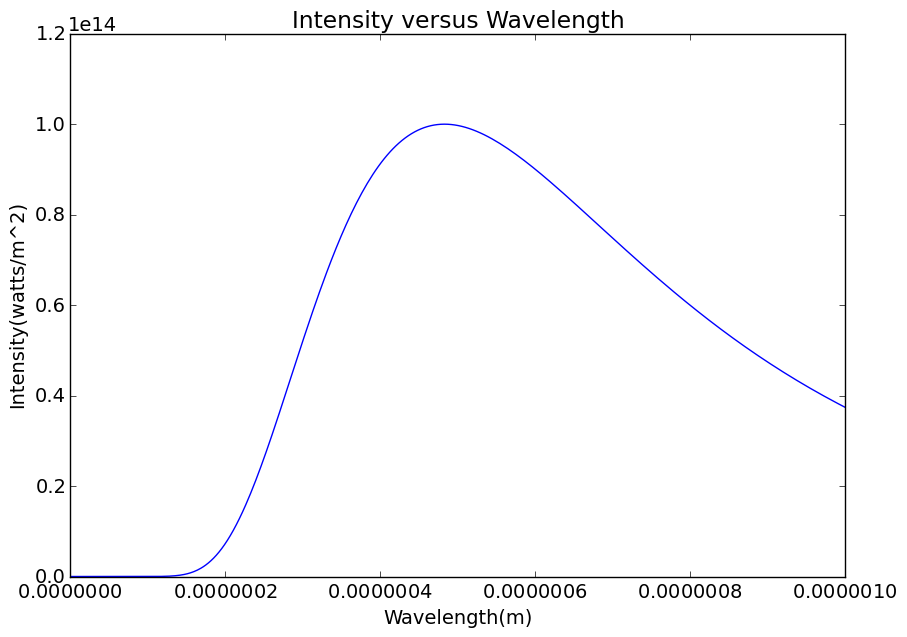

In [18]:
def I(lamb):
    return (2*math.pi*h*(c**2)*(lamb**(-5)))/(np.exp(h*c/(lamb*k*T))-1)

y = []

lamb = np.logspace(-10,-6, 1000)

for i in lamb:
    y.append(I(i))
    
#ax1.xaxis.set_majorformatter (ScalarFormatter (useMathText=True))
#formater tick formatting using scalar-fromatter


#set up the plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

#format the x-axis tick labels
ax.xaxis.set_major_formatter (ScalarFormatter (useMathText=True))

#plot the function - both left hand side and right hand side
ax.plot(lamb, y)

#add good labels
ax.set_xlabel("Wavelength(m)")
ax.set_ylabel("Intensity(watts/m^2)")
ax.set_title ("Intensity versus Wavelength")

print(wienFunc,(-1,0), 1e-6)

<div class=answer>
<div/>

The x-axis shows the wavelength from a black body from 0 to 10nm. The y-axis shows the intensity of a black body at the given wavelength and ranges from 0 to 1.2 $W/m^2$. The function graphed is the intensity of radiation per unit area and per unit wavelength of a black body at temperature T, given by the equation $I (\lambda) = \frac{2 \pi h c^2 \lambda^{-5}}{e^{h c / \lambda k_B T} - 1}$. From 0 to approximatly 1.5nm the intensity value is near zero. The intensity then increases rapidly until around 4nm at which point the function quickly levels off. The intensity then slowly decreases with an increases in wavelength.

Text(0,0.5,'$x + 5 e^{-x} - 5$')

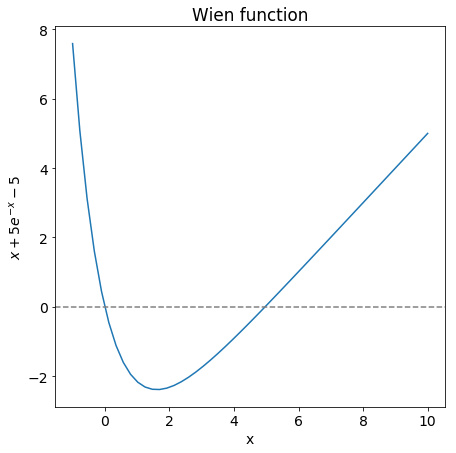

In [64]:
#define the x-range
xValues = np.linspace(-1, 10)
yValues = wienFunc (xValues)

#set up the plot
fig = plt.figure(figsize=(7,7))

#plot the function
plt.plot(xValues, yValues)
#plot y = 0
plt.axhline(y=0,ls='--',color='gray')

#add good labels
plt.title ("Wien function")
plt.xlabel("x")
plt.ylabel(r"$x + 5 e^{-x} - 5$")

<div class=answer>
<div/>
The x-axis shows the independant values ranging from 0 to 10.  The y-axis shows the function $y = x + 5e^{-x} - 5$ evaluated at each individual independant value.  The blue line shows the function, and the dotted grey line shows the function $y = x$.  The grey line goes horizontally from left to right at a y position of 0.  It insterects the blue line at two separate x values.  The first x value is zero.  The second x value is 4.965.  These values are important because they are the roots to the initial function.  These roots help us find the wavelengths that correspond to the maximum intensity. 

## b)

In [76]:
#def bisection(f,interval,tolerance,verbose=False):

interval = (4, 6)
tolerance = 1e-6

print ("solution to", interval, "=", bisection (wienFunc, interval, tolerance, verbose = True), "\n")

interval = (-0.5, 0.5)
print ("solution to", interval, "=", bisection (wienFunc, interval, tolerance, verbose = True))

iteration 1 (bisection): interval (4, 5.0) root 4.5
iteration 2 (bisection): interval (4.5, 5.0) root 4.75
iteration 3 (bisection): interval (4.75, 5.0) root 4.875
iteration 4 (bisection): interval (4.875, 5.0) root 4.9375
iteration 5 (bisection): interval (4.9375, 5.0) root 4.96875
iteration 6 (bisection): interval (4.9375, 4.96875) root 4.953125
iteration 7 (bisection): interval (4.953125, 4.96875) root 4.9609375
iteration 8 (bisection): interval (4.9609375, 4.96875) root 4.96484375
iteration 9 (bisection): interval (4.96484375, 4.96875) root 4.966796875
iteration 10 (bisection): interval (4.96484375, 4.966796875) root 4.9658203125
iteration 11 (bisection): interval (4.96484375, 4.9658203125) root 4.96533203125
iteration 12 (bisection): interval (4.96484375, 4.96533203125) root 4.965087890625
iteration 13 (bisection): interval (4.965087890625, 4.96533203125) root 4.9652099609375
iteration 14 (bisection): interval (4.965087890625, 4.9652099609375) root 4.96514892578125
iteration 15 (b

The trivial solultion to these equation is clearly 0. The other root value is approximatly 4.965113639831543, the calculation of which took 20 bisections to compute with a tolerance of $10^{-6}$.

## c)

$\lambda = \frac{h c }{k_B T x}$

$T = \frac{h c }{k_B \lambda x}$

In [82]:
xValue = 4.965113639831543
wavelength = 502e-9 #m
sunTemp = const.h * const.c / (const.k * xValue * wavelength) #K
sunTempAccepted = 5778 #K

error = abs (sunTempAccepted - sunTemp) / sunTempAccepted * 100

print ("Temperature of Sun (calculated) = {} K".format (sunTemp))
print ("Temperature of Sun (accepted)   = {} K".format (sunTempAccepted))
print ("Percent error = {:.5}%".format (error))

Temperature of Sun (calculated) = 5772.45669319182 K
Temperature of Sun (accepted)   = 5778 K
Percent error = 0.095938%


This value is very close to the surface temperature of the sun according to wikipedia (https://en.wikipedia.org/wiki/Sun) posted at 5,778 K.

## Exercise 6: Newton-Raphson method

Now let us go ahead and code a function to implement the Newton-Raphson method.  I have gotten us started by defining the interface:

In [29]:
def newton(f, fp, x_guess, tolerance, verbose=False, max_iterations=100):
    """ Find root by Newton's method.

    The 'approximation' x_i at each iteration is defined by Newton's
    method, in terms of the previous approximation x_(i-1).
    
    The 'error' x_i-x_(i-1) is defined by the difference in successive
    approximations.

    Returns None if the maximum number of iterations is reached
    without satisfying the tolerance.  Also returns None if
    rootfinding lands on point where f has zero slope.  Otherwise,
    returns final approximation x_i when termination condition is
    reached.

    f: function for rootfinding
    fp: derivative of function for rootfinding (i.e., 'f prime')
    x_guess: initial guess point
    tolerance: error at which search should terminate
    verbose (optional): whether or not to print iteration log
    max_iterations (optional): limit on number of iterations
    """

    # set up for first iteration
    x = x_guess
    error = 2*tolerance  # set error big enough to get past while condition
    iteration_count = 0

    # TODO
    while abs (error) > tolerance:
        
        if iteration_count > max_iterations:
            return None
        
        iteration_count += 1
        xCur = x - f (x) / fp (x)
        error = xCur - x
        x = xCur
        
        if verbose:
           print ("iteration", iteration_count, "(newton): root", xCur, "error", error)
    
    
    return x


Notice that, in case of complete failure, we should put in a maximum number of iterations as a "safety net", to avoid an infinite loop.

Try your function out on our benchmark function, picking starting points reasonably near the root.  Actually, when it comes time to print out a test case to hand in, please use $x_0=0.5$.

Now, we probably thought of bisection as being pretty "fast" as a way to get to the root.  After all, we saw in **Exercise 3** the error in the bisection method falls exponentially with the number of iterations
$$
\epsilon_i \propto \frac{1}{2^i}.
$$
And "exponential" is "fast", right?  But from Newman you have seen that we expect the Newton-Raphson method to be even faster, at least, once we have gotten close enough to a root that the function is basically described by the first couple of terms in its Taylor series around that root.
 
So let us actually compare the performance of ```bisect``` and ```newton```.  We have already run the necessary test cases.  For ```bisect```, we started with the initial interval $(0,1)$, and, for ```newton```, 
we used $x_0=0.5$, which is the midpoint of this interval.  So it seems reasonable to compare these test cases.  Based on your log of iterations (from the verbose output) make a table indicating how many how many digits of
the answer $x_i$ are correct, with each method, after each iteration ($i=0$, $1$, $2$, $\ldots$).

In [92]:
#your code here

if (__name__ == "__main__"):
    # newton tests
    print("newton (f_bench, fp_bench, 0.5, 1e-10, verbose=True)")
    print(newton (f_bench, fp_bench, 0.5, 1e-10, verbose=True))


newton (f_bench, fp_bench, 0.5, 1e-10, verbose=True)
iteration 1 (newton): root 0.7552224171056364 error 0.2552224171056364
iteration 2 (newton): root 0.7391416661498792 error -0.016080750955757228
iteration 3 (newton): root 0.7390851339208068 error -5.653222907242572e-05
iteration 4 (newton): root 0.7390851332151607 error -7.056460971099909e-10
iteration 5 (newton): root 0.7390851332151607 error 0.0
0.7390851332151607


bisection(f_bench,(0,1),1e-10,verbose=True)  
iteration 1 (bisection): interval (0.5, 1) root 0.75  
iteration 2 (bisection): interval (0.5, 0.75) root 0.625  
iteration 3 (bisection): interval (0.625, 0.75) root 0.6875  
iteration 4 (bisection): interval (0.6875, 0.75) root 0.71875  
iteration 5 (bisection): interval (0.71875, 0.75) root 0.734375  
iteration 6 (bisection): interval (0.734375, 0.75) root 0.7421875  
iteration 7 (bisection): interval (0.734375, 0.7421875) root 0.73828125  
iteration 8 (bisection): interval (0.73828125, 0.7421875) root 0.740234375  
iteration 9 (bisection): interval (0.73828125, 0.740234375) root 0.7392578125  
iteration 10 (bisection): interval (0.73828125, 0.7392578125) root 0.73876953125  
iteration 11 (bisection): interval (0.73876953125, 0.7392578125) root 0.739013671875  
iteration 12 (bisection): interval (0.739013671875, 0.7392578125) root 0.7391357421875  
iteration 13 (bisection): interval (0.739013671875, 0.7391357421875) root 0.73907470703125  
iteration 14 (bisection): interval (0.73907470703125, 0.7391357421875) root 0.739105224609375  
iteration 15 (bisection): interval (0.73907470703125, 0.739105224609375) root 0.7390899658203125  
iteration 16 (bisection): interval (0.73907470703125, 0.7390899658203125) root 0.7390823364257812  
iteration 17 (bisection): interval (0.7390823364257812, 0.7390899658203125) root 0.7390861511230469  
iteration 18 (bisection): interval (0.7390823364257812, 0.7390861511230469) root 0.7390842437744141  
iteration 19 (bisection): interval (0.7390842437744141, 0.7390861511230469) root 0.7390851974487305  
iteration 20 (bisection): interval (0.7390842437744141, 0.7390851974487305) root 0.7390847206115723  
iteration 21 (bisection): interval (0.7390847206115723, 0.7390851974487305) root 0.7390849590301514  
iteration 22 (bisection): interval (0.7390849590301514, 0.7390851974487305) root 0.7390850782394409  
iteration 23 (bisection): interval (0.7390850782394409, 0.7390851974487305) root 0.7390851378440857  
iteration 24 (bisection): interval (0.7390850782394409, 0.7390851378440857) root 0.7390851080417633  
iteration 25 (bisection): interval (0.7390851080417633, 0.7390851378440857) root 0.7390851229429245  
iteration 26 (bisection): interval (0.7390851229429245, 0.7390851378440857) root 0.7390851303935051  
iteration 27 (bisection): interval (0.7390851303935051, 0.7390851378440857) root 0.7390851341187954  
iteration 28 (bisection): interval (0.7390851303935051, 0.7390851341187954) root 0.7390851322561502  
iteration 29 (bisection): interval (0.7390851322561502, 0.7390851341187954) root 0.7390851331874728  
iteration 30 (bisection): interval (0.7390851331874728, 0.7390851341187954) root 0.7390851336531341  
iteration 31 (bisection): interval (0.7390851331874728, 0.7390851336531341) root 0.7390851334203035  
iteration 32 (bisection): interval (0.7390851331874728, 0.7390851334203035) root 0.7390851333038881  
iteration 33 (bisection): interval (0.7390851331874728, 0.7390851333038881) root 0.7390851332456805  
0.7390851332456805


[0.75,
0.625,
0.6875,
0.71875,
0.734375,
0.7421875,
0.73828125,
0.740234375,
0.7392578125,
0.73876953125,
0.739013671875,
0.7391357421875,
0.73907470703125,
0.739105224609375,
0.7390899658203125,
0.7390823364257812,
0.7390861511230469,
0.7390842437744141,
0.7390851974487305,
0.7390847206115723,
0.7390849590301514,
0.7390850782394409,
0.7390851378440857,
0.7390851080417633,
0.7390851229429245,
0.7390851303935051,
0.7390851341187954,
0.7390851322561502,
0.7390851331874728,
0.7390851336531341,
0.7390851334203035,
0.7390851333038881,
0.7390851332456805,
]

In [19]:
def numCorrectDigits (exactAnswer, approxAnswer):
    """
    Description: calculates the number of digits the approximate answer has with the exact answer
    
    Parameters:exactAnswer - float
               approxAnswer - float
    
    Returned: int
    
    Usage:
    numCorrectDigits (0.5789, 0.5)
    1
    """
    
    numDigits = 0
    
    exactStr = str (exactAnswer)
    approxStr = str (approxAnswer)
    
    for i in range (min (len (exactStr), len (approxStr))):
        if exactStr[i] == approxStr[i] and '.' != exactStr[i]:
            numDigits += 1
        elif exactStr[i] != approxStr[i]:
            break
            
    return numDigits

In [20]:
bisectionValues = [0.75,
                    0.625,
                    0.6875,
                    0.71875,
                    0.734375,
                    0.7421875,
                    0.73828125,
                    0.740234375,
                    0.7392578125,
                    0.73876953125,
                    0.739013671875,
                    0.7391357421875,
                    0.73907470703125,
                    0.739105224609375,
                    0.7390899658203125,
                    0.7390823364257812,
                    0.7390861511230469,
                    0.7390842437744141,
                    0.7390851974487305,
                    0.7390847206115723,
                    0.7390849590301514,
                    0.7390850782394409,
                    0.7390851378440857,
                    0.7390851080417633,
                    0.7390851229429245,
                    0.7390851303935051,
                    0.7390851341187954,
                    0.7390851322561502,
                    0.7390851331874728,
                    0.7390851336531341,
                    0.7390851334203035,
                    0.7390851333038881,
                    0.7390851332456805,
                    ]
bisectionExact = 0.7390851332456805

newtonValues = [0.2552224171056364,
                0.7391416661498792,
                0.7390851339208068,
                0.7390851332151607,
                0.7390851332151607,
                ]
newtonExact = 0.7390851332151607

bisectionNumDigits = []
newtonNumDigits = []

for x in bisectionValues:
    bisectionNumDigits.append (numCorrectDigits (bisectionExact, x))
    
for x in newtonValues:
    newtonNumDigits.append (numCorrectDigits (newtonExact, x))


print ("{:>10} {:>10} {:>10}".format ("Iteration", "Newton", "Bisection"))
maxIterations = max (len (bisectionNumDigits), len (newtonNumDigits))
lenBisec = len (bisectionNumDigits)
lenNewt = len (newtonNumDigits)

for i in range (maxIterations):
    iteration = str (i)
    bisec = ""
    newt = ""
    
    bBisec = lenBisec > i
    bNewt  = lenNewt > i
    
    if bBisec:
        bisec = str (bisectionNumDigits[i])
    
    if bNewt:
        newt = str (newtonNumDigits[i])
        
    print ("{:>10} {:>10} {:>10}".format (iteration, newt, bisec))

 Iteration     Newton  Bisection
         0          1          2
         1          4          1
         2         10          1
         3         17          2
         4         17          3
         5                     2
         6                     3
         7                     2
         8                     4
         9                     3
        10                     5
        11                     4
        12                     5
        13                     4
        14                     6
        15                     6
        16                     6
        17                     6
        18                     8
        19                     6
        20                     6
        21                     7
        22                     9
        23                     8
        24                     8
        25                     9
        26                     9
        27                     9
        28                    10
        29

<div class=answer>
<div/>
Answer here

See table above.

For the *bisection* method, does the growth in the number of correct digits look linear in the number of iterations, or perhaps quadratic, or exponential?  How about for the *Newton-Raphson* method (the trend here may be
harder to judge by eye)?  Explain these results in terms of the expected convergence rates (from Newman).

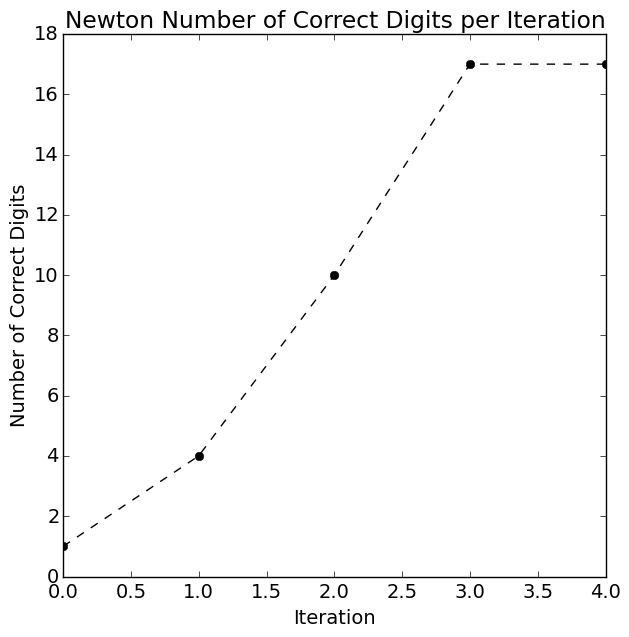

In [21]:
#set up the plot
fig = plt.figure(figsize=(7,7))

#plot newton number of digits
plt.plot(newtonNumDigits, "k--o")

#add good labels
plt.title ("Newton Number of Correct Digits per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Number of Correct Digits")

<div class=answer>
<div/>

The x-axis shows the number of iterations run to calculate the root value of the benchmark function $\cos (x) - x$ using the Newton-Raphson method. The x-axisr anges from 0 to 4. The y-axis is the number of digits to which the given iteration's root solution is accurate with the correct root value, and ranges from 0 to 18. Newton is quadratic

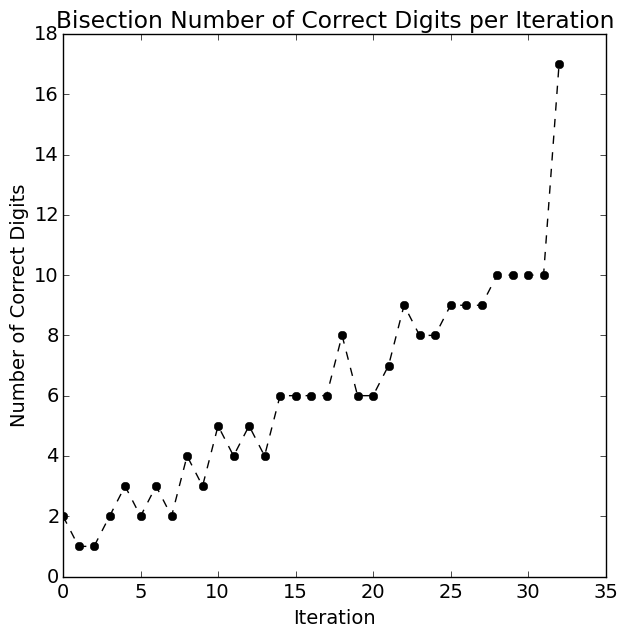

In [22]:
#set up the plot
fig = plt.figure(figsize=(7,7))

#plot newton number of digits
plt.plot(bisectionNumDigits, "k--o")

#add good labels
plt.title ("Bisection Number of Correct Digits per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Number of Correct Digits")

<div class=answer>
<div/>

The x-axis shows the number of iterations run to calculate the root value of the benchmark function $\cos (x) - x$ using the Bisection method. The x-axis ranges from 0 to 35. The y-axis shows the number of digits the current iteration's solution value is correct to with the accepted value. The y-axis ranges from 0 - 35. The bisection is logrithmic

What happens if you start Newton's method instead with the initial guess point $x=5$?  How about $x=10$?  Explain what's going on.  It will help to look back at your plot of this function.  

In [36]:
if (__name__ == "__main__"):
    
    # newton tests
    print("newton (f_bench, fp_bench, 5, 1e-10, verbose=True)")
    print(newton (f_bench, fp_bench, 5, 1e-10, verbose=True))
    
    print("newton (f_bench, fp_bench, 10, 1e-10, verbose=True)")
    print(newton (f_bench, fp_bench, 10, 1e-10, verbose=True))
    

newton (f_bench, fp_bench, 5, 1e-10, verbose=True)
iteration 1 (newton): root -109.820560705 error -114.820560705
iteration 2 (newton): root 15.9607775611 error 125.781338266
iteration 3 (newton): root -6.61511546173 error -22.5758930228
iteration 4 (newton): root 4.60009970473 error 11.2152151665
iteration 5 (newton): root -743.619725193 error -748.219824898
iteration 6 (newton): root 3090.75839064 error 3834.37811583
iteration 7 (newton): root -3606.14007271 error -6696.89846335
iteration 8 (newton): root -1024.21822264 error 2581.92185007
iteration 9 (newton): root 65.2592470776 error 1089.47746971
iteration 10 (newton): root 25.3714027324 error -39.8878443452
iteration 11 (newton): root 5.63692971598 error -19.7344730164
iteration 12 (newton): root -6.52647233436 error -12.1634020503
iteration 13 (newton): root 3.3496519727 error 9.87612430706
iteration 14 (newton): root -2.10519474247 error -5.45484671516
iteration 15 (newton): root 9.34091211073 error 11.4461068532
iteration 16 (

<div class=answer>
<div/>
It took 22 and 101 iterations for starting x-values of 5 and 10 respectivly.

## Exercise 7: More on Newton's method

Here's one more illustration with Newton's method.  Let's try it out on the function

$$
\begin{equation}
f(x)=x^2+1.
\end{equation}
$$

What happens if you pick $x=0$ as the starting point?  How about
$x=0.5$?

In [37]:
#your code here
if (__name__ == "__main__"):
    def f_bench2 (x):
        return x * x + 1
    
    def fp_bench2 (x):
        return 2 * x
    
    # newton tests
    print("newton (f_bench2, fp_bench2, 0.5, 1e-10, verbose=True)")
    print(newton (f_bench2, fp_bench2, 0.5, 1e-10, verbose=True))
    
    print("newton (f_bench2, fp_bench2, 0, 1e-10, verbose=True)")
    print(newton (f_bench2, fp_bench2, 0, 1e-10, verbose=True))

newton (f_bench2, fp_bench2, 0.5, 1e-10, verbose=True)
iteration 1 (newton): root -0.75 error -1.25
iteration 2 (newton): root 0.29166666666666674 error 1.0416666666666667
iteration 3 (newton): root -1.5684523809523803 error -1.860119047619047
iteration 4 (newton): root -0.4654406117285619 error 1.1030117692238184
iteration 5 (newton): root 0.841530602630985 error 1.3069712143595469
iteration 6 (newton): root -0.1733901559391644 error -1.0149207585701494
iteration 7 (newton): root 2.7969749740686076 error 2.970365130007772
iteration 8 (newton): root 1.2197229272382335 error -1.5772520468303741
iteration 9 (newton): root 0.1999322995161441 error -1.0197906277220894
iteration 10 (newton): root -2.4008803928468465 error -2.6008126923629904
iteration 11 (newton): root -0.992183258056275 error 1.4086971347905715
iteration 12 (newton): root 0.007847533359584213 error 1.0000307914158593
iteration 13 (newton): root -63.71036416168544 error -63.71821169504503
iteration 14 (newton): root -31.847

ZeroDivisionError: division by zero

<div class=answer>
<div/>
Answer here

*Comment:* Notice that we were applying a rootfinding method, to a function which
had no root. A physics professor of mine promulgated this bit of wisdom:

    **First rule: Think before you try cranking away!**

But, even if we were immune to being so silly as to ever attempt this, there is
a lesson to be learned.  What if our function *had* a root, off somewhere far away from the initial guess point, but the guess point landed us near a local minimum in the function?  Our function would locally look just like this parabola, and the Newton-Raphson method could become trapped oscillating around the minimum, in just this fashion.

**Summary:** Here is an attempt at summarizing the lessons we have learned.  When it works, Newton-Raphson converges much more rapidly than bisection.  However, sometimes it jumps around before converging.  Sometimes it just oscillates, without converging.  Or, if the starting point is not close enough to a root, the method may go
completely astray.

**When it's good, it's very, very good.  When it's bad, it's horrid.**

## Exericise 8 - The Lagrange Point.  
Work out Newman's Exercise 6.16 below **in a lab format**.  As in the percolation problem, 
* plot and label the numerical function you are trying to solve before "cranking away."  
* write a thoughtful description about each plot
* take note of the tolerance you choose and the number of steps required to solve.

You can use the astropy version of the constants library, you may have to install astropy to use them, but I did not
http://docs.astropy.org/en/stable/constants/

In [10]:
from astropy import constants as a_const

print(const.G)
print("Note that you can do arithmetic with the 'Value': 5*G =")
print(const.G*5)



  Name   = Gravitational constant
  Value  = 6.67408e-11
  Uncertainty  = 3.1e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2014
Note that you can do arithmetic with the 'Value': 5*G =
3.3370400000000003e-10 m3 / (kg s2)
